In [48]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin

In [49]:
automobile = pd.read_csv("automobile_data.csv")
automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [50]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [51]:
automobile = automobile.replace('?', np.nan)
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [52]:
automobile["normalized-losses"]

0      NaN
1      NaN
2      NaN
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: object

In [53]:
automobile["engine-location"].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

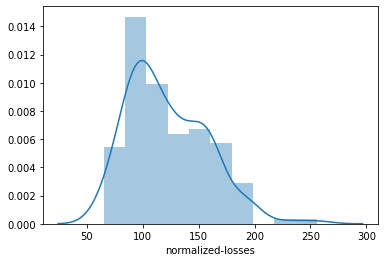

In [54]:
nl = automobile["normalized-losses"].dropna()
sns.distplot(nl,kde=True)

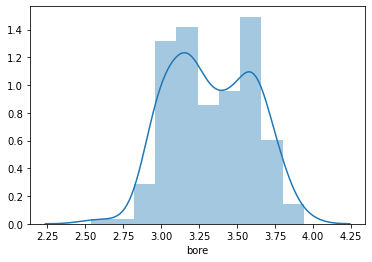

In [55]:
b = automobile["bore"].dropna()
sns.distplot(b,kde=True)

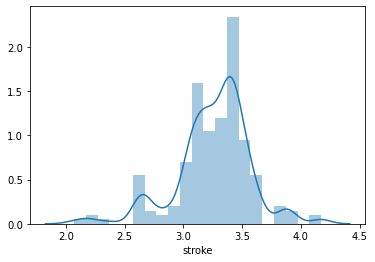

In [56]:
s = automobile["stroke"].dropna()
sns.distplot(s, kde=True)

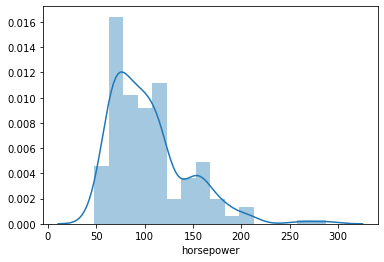

In [57]:
nl = automobile["horsepower"].dropna()
sns.distplot(nl,kde=True)

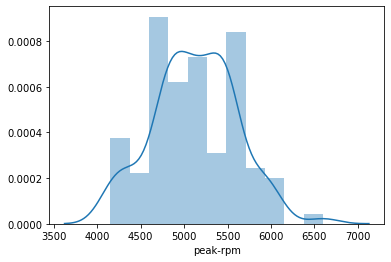

In [58]:
nl = automobile["peak-rpm"].dropna()
sns.distplot(nl,kde=True)

In [59]:
automobile[automobile.isnull().any(axis=1)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,NaN
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


In [60]:
mask_price_null = automobile["price"].isnull()
automobile = automobile[~mask_price_null]

In [61]:
#automobile["normalized-losses"] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(automobile["normalized-losses"].values.reshape(-1,1))
#automobile["num-of-doors"] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(automobile["num-of-doors"].values.reshape(-1,1))
#automobile["bore"] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(automobile["bore"].values.reshape(-1,1))
#automobile["stroke"] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(automobile["stroke"].values.reshape(-1,1))
#automobile["horsepower"] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(automobile["horsepower"].values.reshape(-1,1))

In [62]:
automobile.dropna(axis = 0, inplace = True)

automobile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    object 
 2   make               159 non-null    object 
 3   fuel-type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num-of-doors       159 non-null    object 
 6   body-style         159 non-null    object 
 7   drive-wheels       159 non-null    object 
 8   engine-location    159 non-null    object 
 9   wheel-base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb-weight        159 non-null    int64  
 14  engine-type        159 non-null    object 
 15  num-of-cylinders   159 non-null    object 
 16  engine-size        159 non

In [63]:
automobile["symboling"] = automobile["symboling"].astype('category')
automobile["make"] = automobile["make"].astype('category')
automobile["fuel-type"] = automobile["fuel-type"].astype('category')
automobile["aspiration"] = automobile["aspiration"].astype('category')
automobile["num-of-doors"] = automobile["num-of-doors"].astype('category')
automobile["body-style"] = automobile["body-style"].astype('category')
automobile["drive-wheels"] = automobile["drive-wheels"].astype('category')
automobile["engine-location"] = automobile["engine-location"].astype('category')
automobile["engine-type"] = automobile["engine-type"].astype('category')
automobile["num-of-cylinders"] = automobile["num-of-cylinders"].astype('category')
automobile["fuel-system"] = automobile["fuel-system"].astype('category')

In [64]:
automobile["normalized-losses"] = automobile["normalized-losses"].astype('int64')
automobile["price"] = automobile["price"].astype('float64')
automobile["bore"] = automobile["bore"].astype('float64')
automobile["stroke"] = automobile["stroke"].astype('float64')
automobile["horsepower"] = automobile["horsepower"].astype('int64')
automobile["peak-rpm"] = automobile["peak-rpm"].astype('int64')
automobile["price"] = automobile["price"].astype('int64')

In [65]:
automobile.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.132075,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,3.300126,3.236352,10.161132,95.836478,5113.836478,26.522013,32.081761,11445.729560
std,35.651285,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,0.267336,0.294888,3.889475,30.718583,465.754864,6.097142,6.459189,5877.856195
min,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,94.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,3.050000,3.105000,8.700000,69.000000,4800.000000,23.000000,28.000000,7372.000000
50%,113.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9233.000000
75%,148.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,3.560000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000


In [66]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          159 non-null    category
 1   normalized-losses  159 non-null    int64   
 2   make               159 non-null    category
 3   fuel-type          159 non-null    category
 4   aspiration         159 non-null    category
 5   num-of-doors       159 non-null    category
 6   body-style         159 non-null    category
 7   drive-wheels       159 non-null    category
 8   engine-location    159 non-null    category
 9   wheel-base         159 non-null    float64 
 10  length             159 non-null    float64 
 11  width              159 non-null    float64 
 12  height             159 non-null    float64 
 13  curb-weight        159 non-null    int64   
 14  engine-type        159 non-null    category
 15  num-of-cylinders   159 non-null    category
 16  engine-s

In [67]:
fig = px.box(automobile, x="symboling", y="price", title='Influência do Fator de Risco no Preço')
fig.show()

In [68]:
fig = px.box(automobile, x="aspiration", y="price", title='Influência de ser ou não Turbo no Preço')
fig.show()

In [69]:
fig = px.box(automobile, x="num-of-doors", y="price", title='Influência do Número de Portas no Preço')
fig.show()

In [70]:
fig = px.box(automobile, x="body-style", y="price", title='Influência do formato no Preço')
fig.show()

In [71]:
fig = px.box(automobile, x="drive-wheels", y="price", title='Influência do tipo de tração no Preço')
fig.show()

In [72]:
fig = px.box(automobile, x="engine-location", y="price", title='Influência da localização do motor no Preço')
fig.show()

In [73]:
fig = px.box(automobile, x="engine-type", y="price", title='Influência do tipo do motor no Preço')
fig.show()

In [74]:
fig = px.box(automobile, x="num-of-cylinders", y="price", title='Influência do número de cilíndros no Preço')
fig.show()

In [75]:
fig = px.box(automobile, x="fuel-system", y="price", title='Influência do sistema de combustível no Preço')
fig.show()

In [76]:
fig = px.box(automobile, x="price")
fig.show()

In [77]:
mask_167 = automobile.index != 167
mask_187 = automobile.index != 187
mask_35 = automobile.index != 35

automobile = automobile[mask_167 & mask_187 & mask_35]

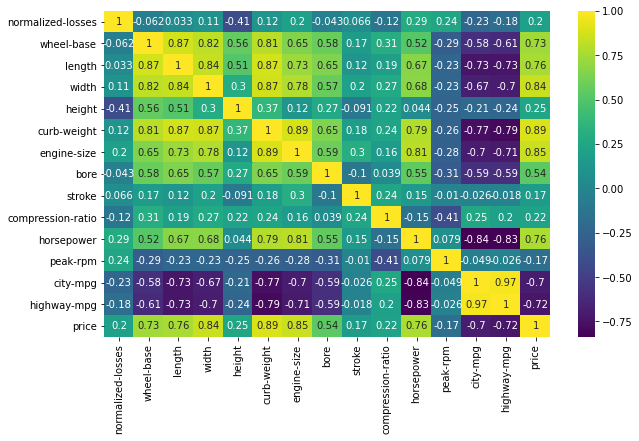

In [78]:
features_numericas = automobile.select_dtypes(include=['int', 'float'])

k = features_numericas.shape[1] #number of variables for heatmap
cols = automobile.corr().index
cm = automobile[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [79]:
automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430
